<a href="https://colab.research.google.com/github/IshaSinghVatsa/MACHINE-LEARNING/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
df = pd.read_csv("/content/infy_stock.csv",header=0)

#DISPLAYING ORIGINAL DATAFRAME
display(df)


,Date,Month,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,January,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,January,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,January,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,January,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,January,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2015-12-24,December,INFY,EQ,1100.85,1102.05,1104.45,1090.1,1095.80,1096.35,1095.84,615027,6.739696e+13,20528,294731,0.4792
244,2015-12-28,December,INFY,EQ,1096.35,1090.00,1110.00,1090.0,1103.80,1104.75,1105.51,2763476,3.055046e+14,51103,1880078,0.6803
245,2015-12-29,December,INFY,EQ,1104.75,1101.25,1110.00,1097.3,1103.00,1104.70,1104.14,1672531,1.846706e+14,52409,967577,0.5785
246,2015-12-30,December,INFY,EQ,1104.70,1101.10,1106.60,1083.0,1088.00,1086.30,1094.45,2576985,2.820380e+14,65379,1754378,0.6808


In [ ]:
#DISPLAYING FIRST FIVE RECORDS
#df['Gender'] = labelEn.fit_transform(df['Gender'])
#df1['cogs'] = df1['cogs'].astype('int')


df.head()

,Date,Month,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,January,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,January,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,January,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,January,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,January,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [ ]:
#DISPLAYING LAST FIVE RECORDS

df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
243,2015-12-24,INFY,EQ,1100.85,1102.05,1104.45,1090.1,1095.8,1096.35,1095.84,615027,6.739696e+13,20528,294731,0.4792
244,2015-12-28,INFY,EQ,1096.35,1090.00,1110.00,1090.0,1103.8,1104.75,1105.51,2763476,3.055046e+14,51103,1880078,0.6803
245,2015-12-29,INFY,EQ,1104.75,1101.25,1110.00,1097.3,1103.0,1104.70,1104.14,1672531,1.846706e+14,52409,967577,0.5785
246,2015-12-30,INFY,EQ,1104.70,1101.10,1106.60,1083.0,1088.0,1086.30,1094.45,2576985,2.820380e+14,65379,1754378,0.6808
247,2015-12-31,INFY,EQ,1086.30,1090.15,1109.95,1087.0,1107.0,1105.40,1102.09,3971969,4.377467e+14,75143,2641827,0.6651


# New section

Boxplots are used to visualize the distribution of data which is useful when a comparison of data is required.

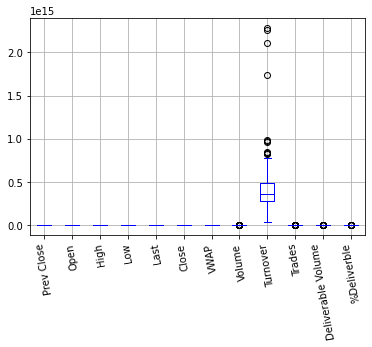

In [ ]:
df.boxplot(grid='false', color='blue',fontsize=10, rot=100 )

In [ ]:
from pandas.core.frame import DataFrame

#RENAMING COLUMN NAME 'LOW' TO 'DOWN'

df2 = df.rename(columns={'Low':'Down'})
df.columns
DataFrame(df2)

,Date,Month,Symbol,Series,Prev Close,Open,High,Down,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,January,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,January,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,January,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,January,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,January,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2015-12-24,December,INFY,EQ,1100.85,1102.05,1104.45,1090.1,1095.80,1096.35,1095.84,615027,6.739696e+13,20528,294731,0.4792
244,2015-12-28,December,INFY,EQ,1096.35,1090.00,1110.00,1090.0,1103.80,1104.75,1105.51,2763476,3.055046e+14,51103,1880078,0.6803
245,2015-12-29,December,INFY,EQ,1104.75,1101.25,1110.00,1097.3,1103.00,1104.70,1104.14,1672531,1.846706e+14,52409,967577,0.5785
246,2015-12-30,December,INFY,EQ,1104.70,1101.10,1106.60,1083.0,1088.00,1086.30,1094.45,2576985,2.820380e+14,65379,1754378,0.6808


In [ ]:
df.Open.mean()
df.groupby('Trades').Open.mean()

Trades
13196     1118.00
14908     1968.95
20528     1102.05
33057     1142.95
35728      988.00
           ...   
286593    1107.45
317809    2135.90
347437    1199.00
359214    1980.10
408583    1035.00
Name: Open, Length: 248, dtype: float64

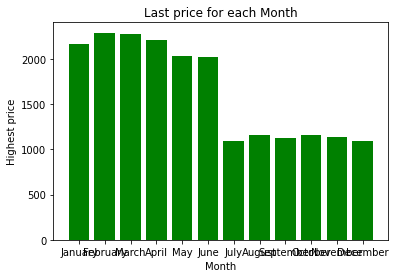

In [ ]:
#BAR PLOT SHOWING VARIATION BETWEEN DATE AND HIGHEST PRICE
import matplotlib.pyplot as plt
  
X = list(df.iloc[:, 1])
Y = list(df.iloc[:, 7])
  
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Last price for each Month")
plt.xlabel("Month")
plt.ylabel("Highest price")
  
# Show the plot
plt.show()

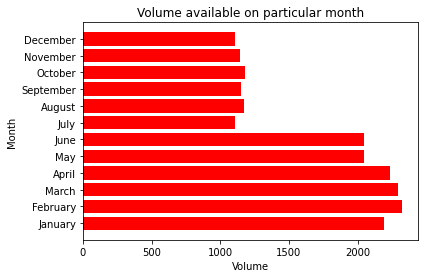

In [ ]:
#HORIZONTAL BAR PLOT SHOWING VARIATION BETWEEN DATE AND VOLUME OF SHARES
  
X = list(df.iloc[:, 1])
Y = list(df.iloc[:, 10])
  
# Plot the data using bar() method
plt.barh(X, Y, color='r')
plt.title("Volume available on particular month")
plt.xlabel("Volume")
plt.ylabel("Month")
  
# Show the plot
plt.show()

histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale.

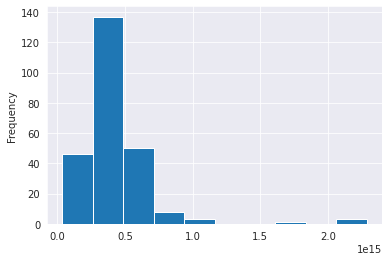

In [ ]:
#HISTOGRAM SHOWING FREQUENCY OF TURNOVER WHEN WHOLE DATA IS DEVIDED INTO 10 BINS

df['Turnover'].plot(kind='hist',bins=10)

A pairs plot allows us to see both distribution of single variables and relationships between two variables .

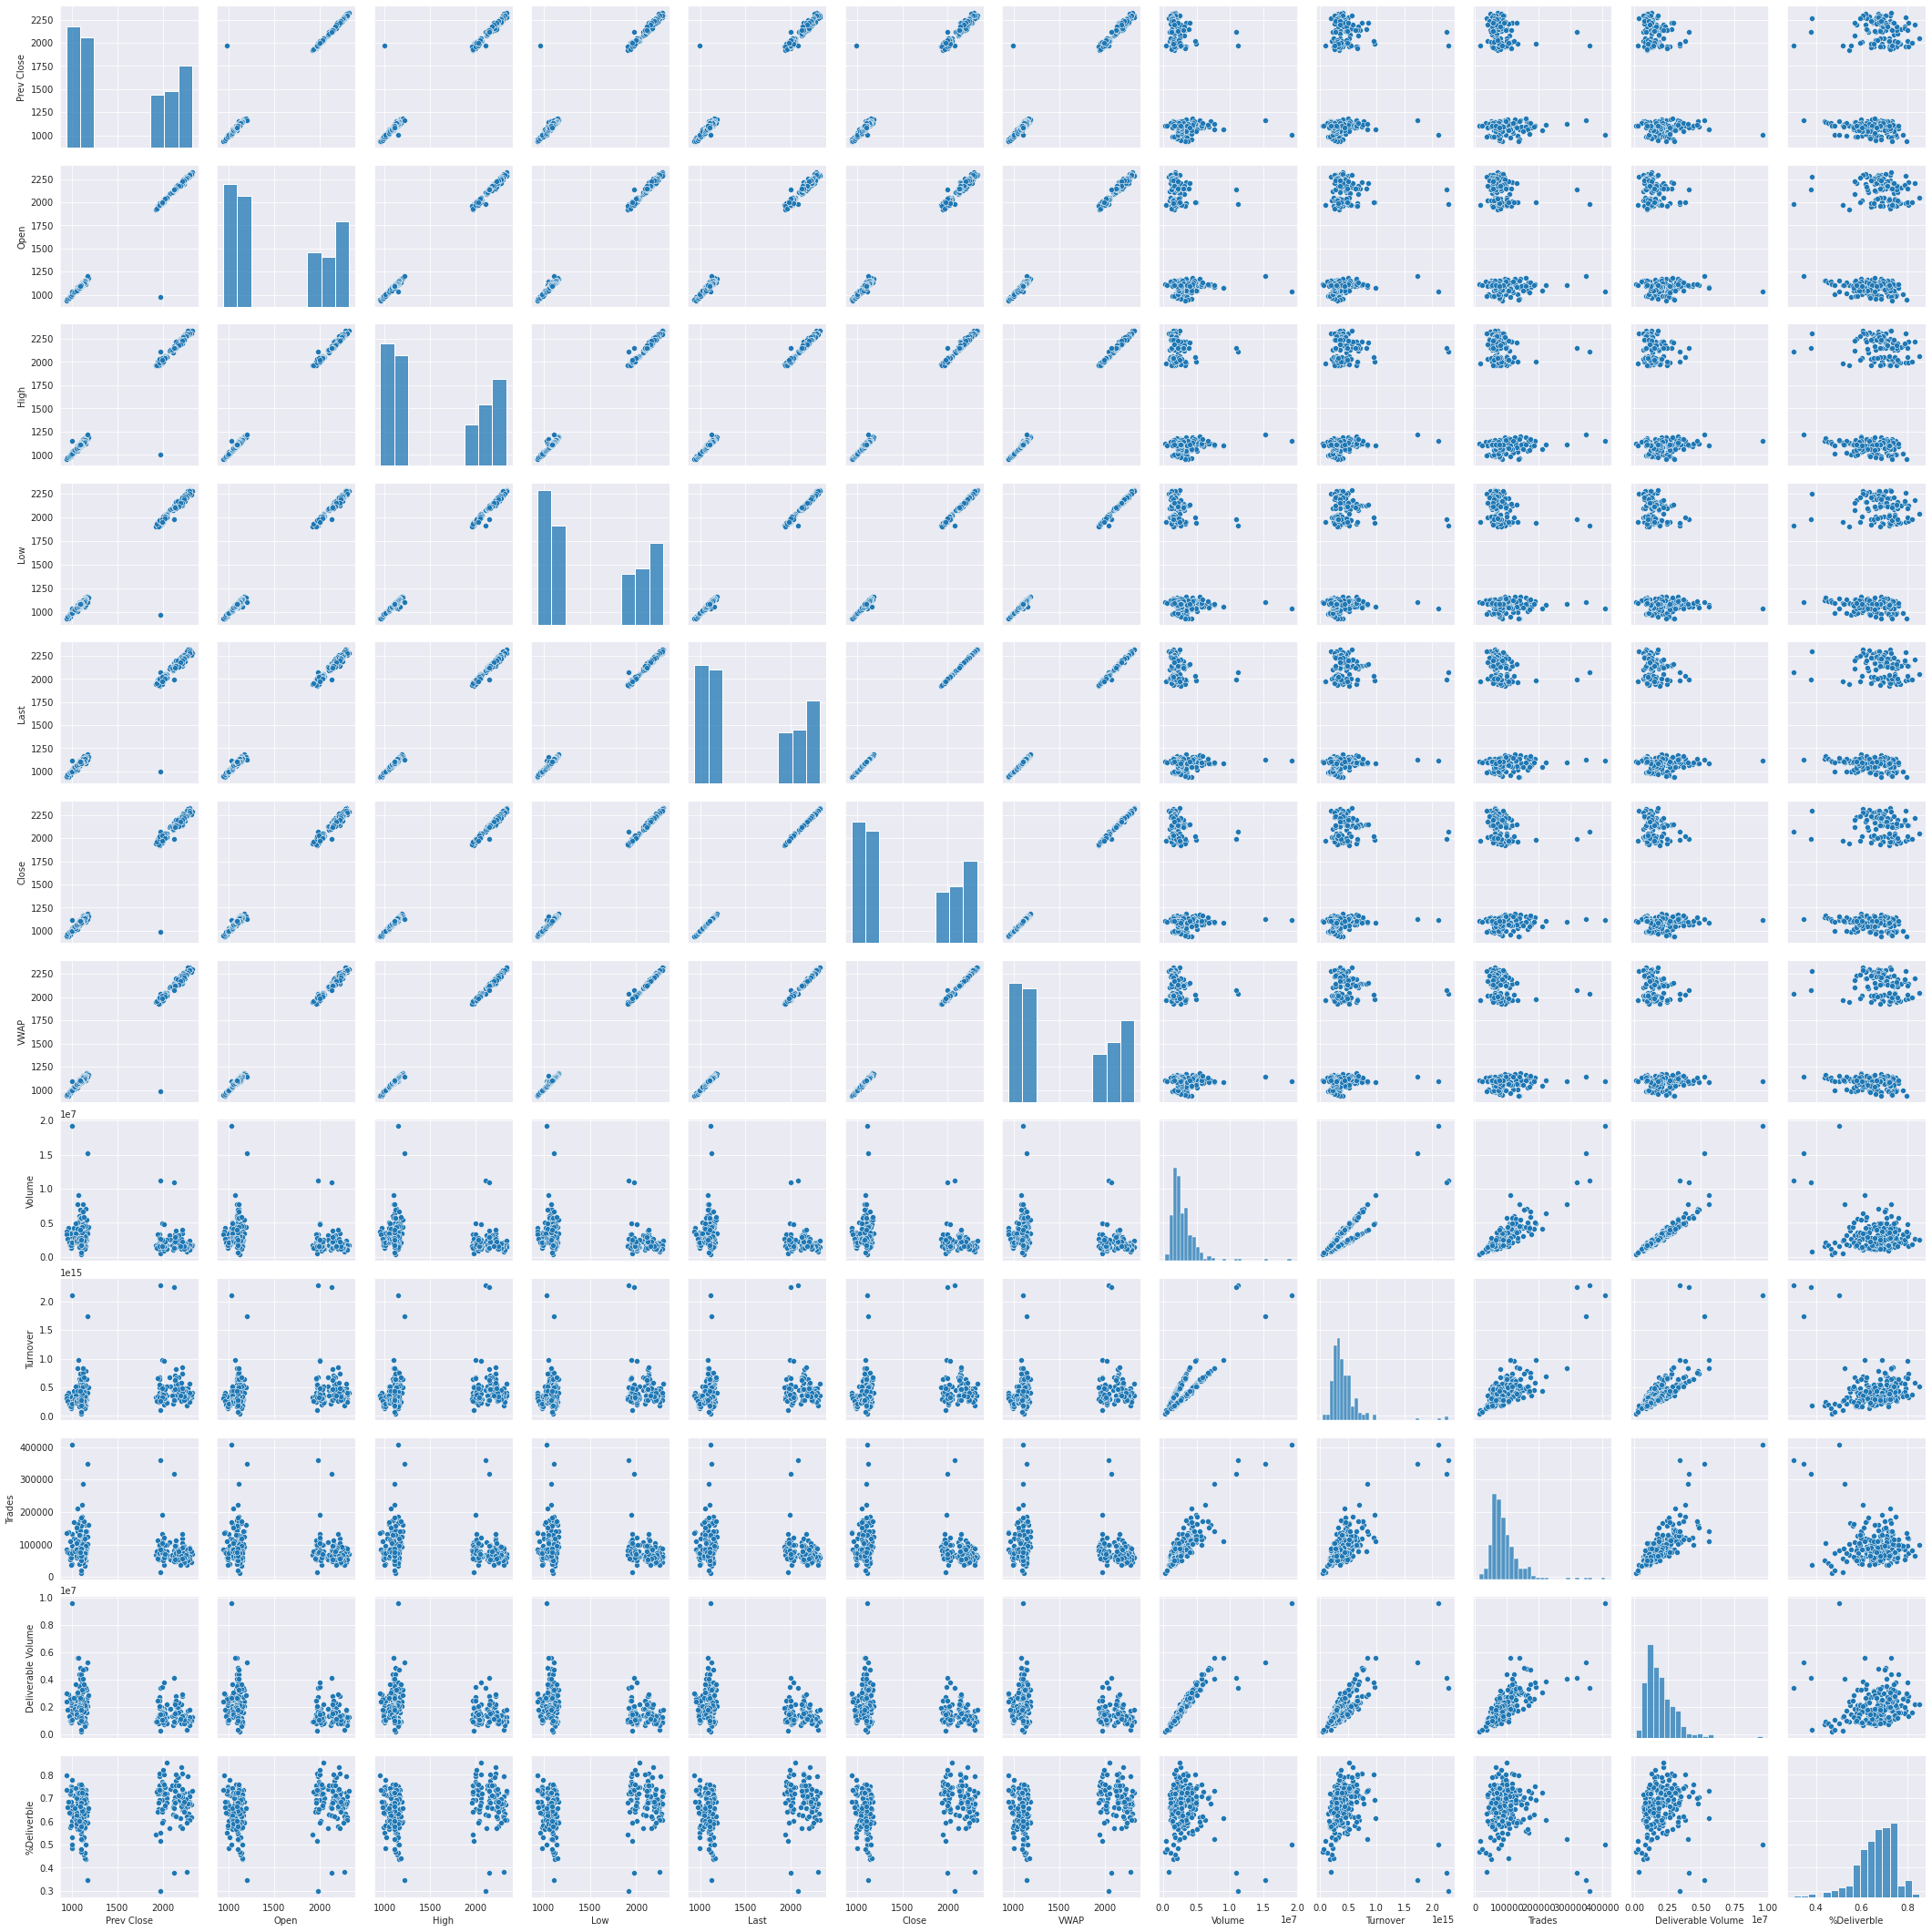

In [ ]:
# A pairs plot allows us to see both distribution of single variables and 
#relationships between two variables.

import seaborn as sns
sns.pairplot(df)

 The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


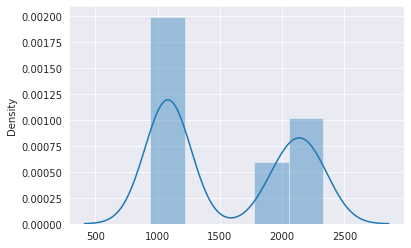

In [ ]:
#The distplot represents the univariate distribution of data i.e. data 
#distribution of a variable against the density distribution.

data=pd.DataFrame([df['Open']])
res=sns.distplot(data)

Jointplot is seaborn library specific and can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

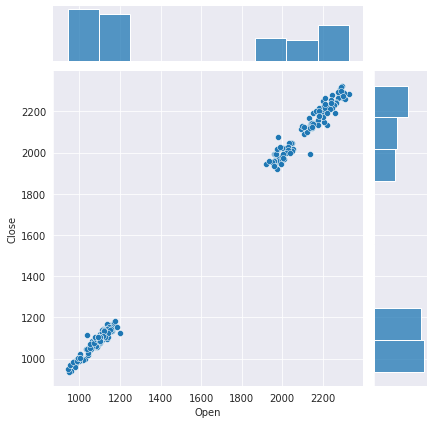

In [ ]:
#Joint Plots are used to explore relationships between bivariate data, as well
# as their distributions at the same time.

sns.set_style("darkgrid")
res=sns.jointplot(x=df['Open'], y=df['Close'])
plt.show()

A strip plot is a single-axis scatter plot that is used to visualise the distribution of many individual one-dimensional values.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


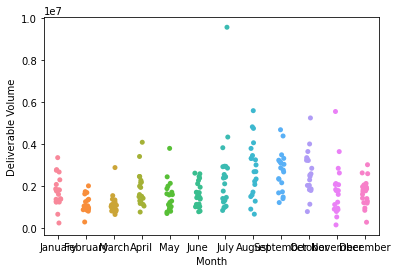

In [ ]:
#STRIPLOT TO DEMONSTRATE VARIATION BETWEEN OPEN COST AND DELIVERABLE VOLUME

sns.stripplot(df['Month'],df['Deliverable Volume'], data=df)

A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


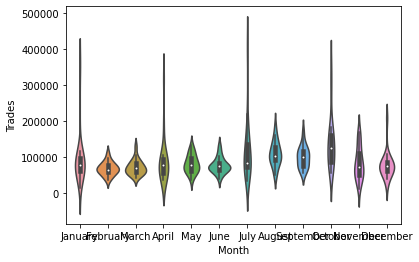

In [ ]:
#VOILINPLOT TO DEMONSTRATE VARIIATION BETWEEN OPEN AND CLOSE VALUE

sns.violinplot(df['Month'],df['Trades'],data=df)
plt.show()

It gives an overview of the complete dataframe which makes it very much easy to understand the key points in the dataframe.

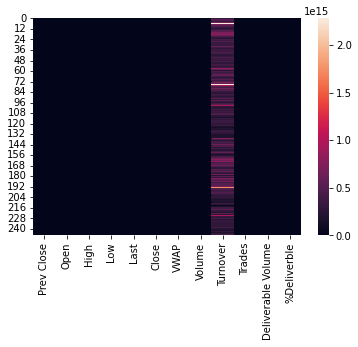

In [ ]:
#A heatmap (or heat map) is a graphical representation of data where values 
#are depicted by color.

dfs = df.drop(['Date','Symbol','Series','Month'], axis=1)
sns.heatmap(dfs)

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. 

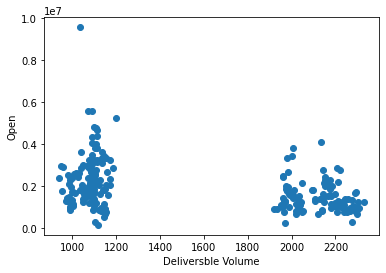

In [ ]:
#SCATTERPLOT WHICH DETERMINES RELATION BETWEEN OPEN VALUE AND DELIVERABLE VALUE 
plt.scatter(df['Open'],df['Deliverable Volume']);
plt.ylabel('Open')
plt.xlabel('Deliversble Volume')
plt.show();

pie draws a pie chart using the data in High Value. Each slice of the pie chart 
represents an element in High value.

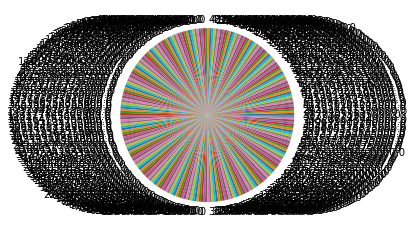

In [ ]:
df["Turnover"].value_counts().plot.pie()

In [ ]:
 #CORRELATION IS CALCULATED USING PEARSON'S FORMULA
df_s = df.corr(method ='pearson')
display(df_s.head())

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Prev Close,1.000000,0.992656,0.992315,0.992154,0.991914,0.991820,0.992275,-0.361369,0.106288,-0.227552,-0.398634,0.235271
Open,0.992656,1.000000,0.999531,0.999385,0.998983,0.998940,0.999403,-0.355925,0.114471,-0.224059,-0.391864,0.244186
High,0.992315,0.999531,1.000000,0.999307,0.999529,0.999519,0.999782,-0.344220,0.126889,-0.213035,-0.383699,0.235797
Low,0.992154,0.999385,0.999307,1.000000,0.999579,0.999575,0.999723,-0.367945,0.099370,-0.237459,-0.400821,0.249143
Last,0.991914,0.998983,0.999529,0.999579,1.000000,0.999979,0.999841,-0.356836,0.112359,-0.226452,-0.392832,0.241965


SimpleImputer is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset.

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
imputer = imputer.fit(dfs)
df = imputer.transform(dfs)
display(dfs)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270
...,...,...,...,...,...,...,...,...,...,...,...,...
243,1100.85,1102.05,1104.45,1090.1,1095.80,1096.35,1095.84,615027,6.739696e+13,20528,294731,0.4792
244,1096.35,1090.00,1110.00,1090.0,1103.80,1104.75,1105.51,2763476,3.055046e+14,51103,1880078,0.6803
245,1104.75,1101.25,1110.00,1097.3,1103.00,1104.70,1104.14,1672531,1.846706e+14,52409,967577,0.5785
246,1104.70,1101.10,1106.60,1083.0,1088.00,1086.30,1094.45,2576985,2.820380e+14,65379,1754378,0.6808


In [ ]:
df1 = pd.read_csv("infy_stock.csv", parse_dates=['Date'],index_col='Date')

df1.isnull().values.any()

False

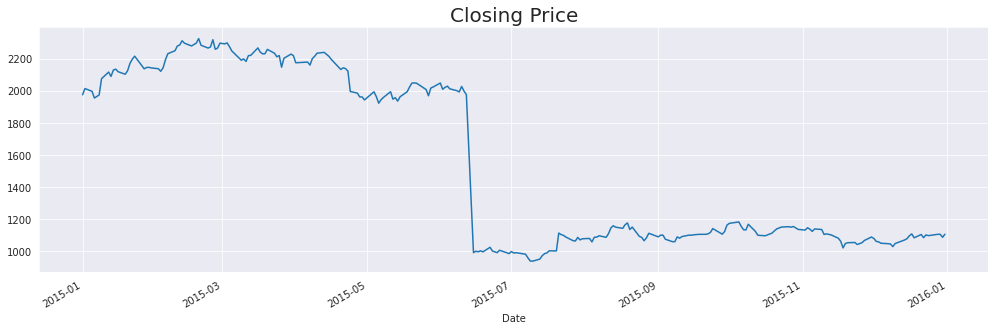

In [ ]:
plt.figure(figsize=(17,5))
df1.Close.plot()
plt.title("Closing Price",fontsize=20)
plt.show()

In [ ]:
df1["Close"] = pd.concat([df1.Close[:'2015-06-12']/2,df1.Close['2015-06-15':]])

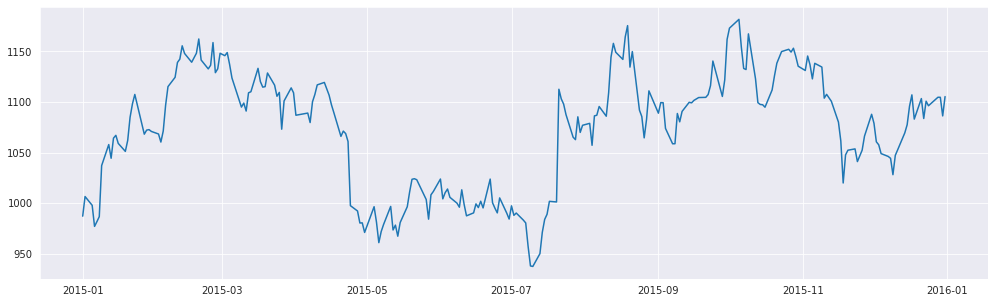

In [ ]:
plt.figure(figsize=(17,5))

plt.plot(df1["Close"])

In [ ]:
df1 = df1.drop(axis=1,columns=['Symbol','Series'])

In [ ]:
df1['day'] = df1.index.day

In [ ]:
df1['month'] = df1.index.month

In [ ]:
df1['year'] = df1.index.year

In [ ]:
df1.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,day,month,year
Date,,,,,,,,,,,,,,,
2015-01-01,1972.55,1968.95,1982.00,1956.9,1971.00,987.200,1971.34,500691,9.870306e+13,14908,258080,0.5154,1,1,2015
2015-01-02,1974.40,1972.00,2019.05,1972.0,2017.95,1006.600,2003.25,1694580,3.394669e+14,54166,1249104,0.7371,2,1,2015
2015-01-05,2013.20,2009.90,2030.00,1977.5,1996.00,997.950,2004.59,2484256,4.979911e+14,82694,1830962,0.7370,5,1,2015
2015-01-06,1995.90,1980.00,1985.00,1934.1,1965.10,977.100,1954.82,2416829,4.724458e+14,108209,1772070,0.7332,6,1,2015
2015-01-07,1954.20,1965.00,1974.75,1950.0,1966.05,981.775,1962.59,1812479,3.557162e+14,62463,1317720,0.7270,7,1,2015


In [ ]:
df1 = df1.drop(axis=1,columns='year')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1 = pd.DataFrame(scaler.fit_transform(df1.values), columns=df1.columns, index=df1.index)

In [ ]:
df1.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,day,month
Date,,,,,,,,,,,,,,
2015-01-01,0.746143,0.740865,0.744201,0.753457,0.746199,0.203480,0.745958,0.007821,0.026475,0.004330,0.009762,0.388929,0.000000,0.0
2015-01-02,0.747477,0.743063,0.770973,0.764565,0.780032,0.282907,0.769064,0.071321,0.133662,0.103620,0.115081,0.789978,0.033333,0.0
2015-01-05,0.775447,0.770378,0.778886,0.768611,0.764214,0.247492,0.770035,0.113322,0.204236,0.175772,0.176916,0.789797,0.133333,0.0
2015-01-06,0.762976,0.748829,0.746369,0.736685,0.741947,0.162129,0.733995,0.109735,0.192864,0.240304,0.170658,0.782923,0.166667,0.0
2015-01-07,0.732915,0.738018,0.738962,0.748382,0.742632,0.181269,0.739622,0.077591,0.140896,0.124605,0.122373,0.771708,0.200000,0.0


In [ ]:
df_train = df1[:-40]
df_test  = df1[-40:]

In [ ]:
x_train = (df1.drop(axis=1,columns="Close")[:-40]).values
y_train = (df1["Close"][:-40]).values
x_test = (df1.drop(axis=1,columns="Close")[-40:]).values
y_test = (df1["Close"][-40:]).values

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=4)

In [ ]:
neigh.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
neigh.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
from sklearn.metrics import mean_squared_error
score_train = mean_squared_error(neigh.predict(x_test), y_test)

In [ ]:
score_train

0.032331989716918016